<a href="https://colab.research.google.com/github/YanPaivaAndrade/Minera-oDeDadosTrabalho3/blob/main/Trabalho_3_Yan_de_Paiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

texto em itálico# **Trabalho 3 - Aluno: Yan de Paiva Andrade Pinto**
Matricula: 201476038
Base de dados: **trabalho3_dados_29**

In [2]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive




# **Tratamento dos dados**
  

*   Remoção de dados duplicados
*   Substituir '' por NaN
*   Substituir 'tdb' por NaN
*   Levantando numero de dados faltantes 

In [199]:
import pandas as pd
dadosTrabalho2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mineracao/trabalho2_dados_29.csv")
dadosTrabalho3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mineracao/trabalho3_dados_adicionais_29.csv")
dadosOriginais = dadosTrabalho2.append(dadosTrabalho3);
dados = dadosOriginais;
print (dadosOriginais.count())

dados = dados.drop_duplicates();
print(dados.count());
dados = dados.replace({'':float('nan')}).replace({'tbd':float('nan')})
dados_null_antes_agrupamento_nome = dados.isnull().sum()
print(dados_null_antes_agrupamento_nome)


nome                  3198
plataforma            3198
genero                3198
editora               3194
vendas                3198
lancamento            2462
avaliacao-criticos    2042
numero-criticos       2042
avaliacao-usuarios    2426
numero-usuarios       1938
fabricante            2450
dtype: int64
nome                  2428
plataforma            2428
genero                2428
editora               2425
vendas                2428
lancamento            1810
avaliacao-criticos    1480
numero-criticos       1480
avaliacao-usuarios    1784
numero-usuarios       1404
fabricante            1801
dtype: int64
nome                     0
plataforma               0
genero                   0
editora                  3
vendas                   0
lancamento             618
avaliacao-criticos     948
numero-criticos        948
avaliacao-usuarios    1024
numero-usuarios       1024
fabricante             627
dtype: int64


# **Transformação, Agrupamento de valores e Calculo da mediana por agrupamento.**
*   Atribuir tipagem numerica para as colunas: "avaliacao-criticos", "numero-criticos", "avaliacao-usuarios" e "numero-usuarios".
*   Agrupar dados por nome do jogo
*   Calcular a mediana dos determinados agrupamentos, a fim de tratar valores faltantes.

Com a definição do id da instancia como “nome”, torna-se indiferente o atributo "plataforma" para minha base de dados. Entretanto esse atributo gerou uma replicação de instancias, uma vez que o jogo poderia estar presente em múltiplas plataformas.

Também durante a analise da base de dados o atributo “fabricante” é ausente em cerca de 25% da base e atualmente não é possível inferir o mesmo com uma precisão satisfatória. Dito isto a tomada de decisão foi excluir este atributo.

Dito isto o objetivo inicial é completar os dados faltantes com maior realismo possível, pra isso agrupei os dados por nome a fim de calcular a mediana dos valores replicados. E substituir nas instancias com valores faltantes.



In [200]:
dados = dados.drop(columns=['plataforma'])
dados = dados.drop(columns=['fabricante'])
for column in dados.columns:
    if (dados[column].isnull().sum() > 0 and (column == "avaliacao-criticos"\
     or column == "numero-criticos" or column == "avaliacao-usuarios"\
      or column == "numero-usuarios")):
        dados[column] = dados[column].apply(pd.to_numeric)

tbl_avaliacao_criticos = dados[["nome","avaliacao-criticos"]]
median_avaliacao_criticos = tbl_avaliacao_criticos.groupby("nome").median()

tbl_numero_criticos = dados[["nome", "numero-criticos"]]
median_numero_criticos = tbl_numero_criticos.groupby("nome").median()

tbl_avaliacao_usuarios = dados[["nome", "avaliacao-usuarios"]]
median_avaliacao_usuarios = tbl_avaliacao_usuarios.groupby("nome").median()

tbl_numero_usuarios = dados[["nome", "numero-usuarios"]]
median_numero_usuarios = tbl_numero_usuarios.groupby("nome").median()


In [201]:
for e in median_avaliacao_criticos.index:
    tbl_avaliacao_criticos.loc[tbl_avaliacao_criticos["nome"] == e] =\
        tbl_avaliacao_criticos.loc[tbl_avaliacao_criticos["nome"] == e].\
            fillna(median_avaliacao_criticos["avaliacao-criticos"].get(e))
dados["avaliacao-criticos"] = tbl_avaliacao_criticos["avaliacao-criticos"]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [202]:
for e in median_numero_criticos.index:
    tbl_numero_criticos.loc[tbl_numero_criticos["nome"] == e] =\
        tbl_numero_criticos.loc[tbl_numero_criticos["nome"] == e].\
            fillna(median_numero_criticos["numero-criticos"].get(e))
dados["numero-criticos"] = tbl_numero_criticos["numero-criticos"]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [203]:
for e in median_avaliacao_usuarios.index:
    tbl_avaliacao_usuarios.loc[tbl_avaliacao_usuarios["nome"] == e] =\
        tbl_avaliacao_usuarios.loc[tbl_avaliacao_usuarios["nome"] == e].\
            fillna(median_avaliacao_usuarios["avaliacao-usuarios"].get(e))
dados["avaliacao-usuarios"] = tbl_avaliacao_usuarios["avaliacao-usuarios"]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [204]:
for e in median_numero_usuarios.index:
    tbl_numero_usuarios.loc[tbl_numero_usuarios["nome"] == e] =\
        tbl_numero_usuarios.loc[tbl_numero_usuarios["nome"] == e].\
            fillna(median_numero_usuarios["numero-usuarios"].get(e))
dados["numero-usuarios"] = tbl_numero_usuarios["numero-usuarios"]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [205]:
print(dados_null_antes_agrupamento_nome)
print(dados.isnull().sum())

nome                     0
plataforma               0
genero                   0
editora                  3
vendas                   0
lancamento             618
avaliacao-criticos     948
numero-criticos        948
avaliacao-usuarios    1024
numero-usuarios       1024
fabricante             627
dtype: int64
nome                    0
genero                  0
editora                 3
vendas                  0
lancamento            618
avaliacao-criticos    829
numero-criticos       829
avaliacao-usuarios    873
numero-usuarios       873
dtype: int64


# **Tratamento final de valores faltantes.**

Para tratar os valores ‘NaN’ ainda presentes no DF, minha decisão foi agrupar o DF pelo atributo “Gênero”, calcular a mediana e substituir os valores faltantes daquele determinado gênero por sua respectiva mediana.
O intuito deste tratamento é definir um comportamento para a comunidade “gamer’’ daquele determinado gênero.


In [206]:
tbl_avaliacao_criticos_genero = dados[["genero","avaliacao-criticos"]]
median_avaliacao_criticos_genero = tbl_avaliacao_criticos_genero.groupby("genero").median()

tbl_numero_criticos_genero = dados[["genero", "numero-criticos"]]
median_numero_criticos_genero = tbl_numero_criticos_genero.groupby("genero").median()

tbl_avaliacao_usuarios_genero = dados[["genero", "avaliacao-usuarios"]]
median_avaliacao_usuarios_genero = tbl_avaliacao_usuarios_genero.groupby("genero").median()

tbl_numero_usuarios_genero = dados[["genero", "numero-usuarios"]]
median_numero_usuarios_genero = tbl_numero_usuarios_genero.groupby("genero").median()


In [207]:
for e in median_avaliacao_criticos_genero.index:
    tbl_avaliacao_criticos_genero.loc[tbl_avaliacao_criticos_genero["genero"] == e] =\
        tbl_avaliacao_criticos_genero.loc[tbl_avaliacao_criticos_genero["genero"] == e].\
            fillna(median_avaliacao_criticos_genero["avaliacao-criticos"].get(e))
dados["avaliacao-criticos"] = tbl_avaliacao_criticos_genero["avaliacao-criticos"]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [208]:
for e in median_numero_criticos_genero.index:
    tbl_numero_criticos_genero.loc[tbl_numero_criticos_genero["genero"] == e] =\
        tbl_numero_criticos_genero.loc[tbl_numero_criticos_genero["genero"] == e].\
            fillna(median_numero_criticos_genero["numero-criticos"].get(e))
dados["numero-criticos"] = tbl_numero_criticos_genero["numero-criticos"]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [209]:
for e in median_avaliacao_usuarios_genero.index:
    tbl_avaliacao_usuarios_genero.loc[tbl_avaliacao_usuarios_genero["genero"] == e] =\
        tbl_avaliacao_usuarios_genero.loc[tbl_avaliacao_usuarios_genero["genero"] == e].\
            fillna(median_avaliacao_usuarios_genero["avaliacao-usuarios"].get(e))
dados["avaliacao-usuarios"] = tbl_avaliacao_usuarios_genero["avaliacao-usuarios"]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [210]:
for e in median_numero_usuarios_genero.index:
    tbl_numero_usuarios_genero.loc[tbl_numero_usuarios_genero["genero"] == e] =\
        tbl_numero_usuarios_genero.loc[tbl_numero_usuarios_genero["genero"] == e].\
            fillna(median_numero_usuarios_genero["numero-usuarios"].get(e))
dados["numero-usuarios"] = tbl_numero_usuarios_genero["numero-usuarios"]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [211]:
print(dados.isnull().sum())

nome                    0
genero                  0
editora                 3
vendas                  0
lancamento            618
avaliacao-criticos      0
numero-criticos         0
avaliacao-usuarios      0
numero-usuarios         0
dtype: int64


# **Gerando uma nova base de dados.**

In [212]:
dados = dados.dropna(subset=["editora"])
dados = dados.drop(columns=['lancamento'])
print(dados.columns)
novoDataFrame = dados.drop_duplicates(subset=["nome"]);
print(novoDataFrame.isnull().sum())
print(dados.isnull().sum())


Index(['nome', 'genero', 'editora', 'vendas', 'avaliacao-criticos',
       'numero-criticos', 'avaliacao-usuarios', 'numero-usuarios'],
      dtype='object')
nome                  0
genero                0
editora               0
vendas                0
avaliacao-criticos    0
numero-criticos       0
avaliacao-usuarios    0
numero-usuarios       0
dtype: int64
nome                  0
genero                0
editora               0
vendas                0
avaliacao-criticos    0
numero-criticos       0
avaliacao-usuarios    0
numero-usuarios       0
dtype: int64


# **Normalizando dados numericos.**

In [213]:
from sklearn import preprocessing
dadosNormalizados = novoDataFrame[["vendas","avaliacao-criticos", "numero-criticos", "avaliacao-usuarios", "numero-usuarios"]]
scaler =  preprocessing.RobustScaler()
normalizados = pd.DataFrame( scaler.fit_transform(dadosNormalizados), columns=dadosNormalizados.columns )
print(normalizados)
print(normalizados.min())
print(normalizados.max())
dadosNormalizados["vendas"] = normalizados["vendas"]
dadosNormalizados["avaliacao-criticos"] = normalizados["avaliacao-criticos"]
dadosNormalizados["numero-criticos"] = normalizados["numero-criticos"] 
dadosNormalizados["avaliacao-usuarios"] = normalizados["avaliacao-usuarios"] 
dadosNormalizados["numero-usuarios"] = normalizados["numero-usuarios"]
print(normalizados.isnull().sum())
print(dadosNormalizados.isnull().sum())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


      vendas  avaliacao-criticos  ...  avaliacao-usuarios  numero-usuarios
0      7.500            0.722222  ...              1.0000         0.984127
1      0.050            1.388889  ...              1.5000         0.190476
2     -0.350           -0.277778  ...              0.5000        -0.095238
3      0.000            0.111111  ...             -0.4375        -0.158730
4     -0.325            0.055556  ...             -0.2500        -0.174603
...      ...                 ...  ...                 ...              ...
1445  -0.300            0.055556  ...             -0.2500        -0.174603
1446  -0.350           -0.277778  ...              0.5000        -0.095238
1447  -0.150           -2.722222  ...             -3.7500        -0.285714
1448  -0.325           -0.277778  ...              0.0000         0.063492
1449   0.625            0.055556  ...             -0.2500        -0.174603

[1450 rows x 5 columns]
vendas               -0.350000
avaliacao-criticos   -6.277778
numero-critic

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

#     **Ordenando dados e gerando graficos**

**Jogos vs Genero**

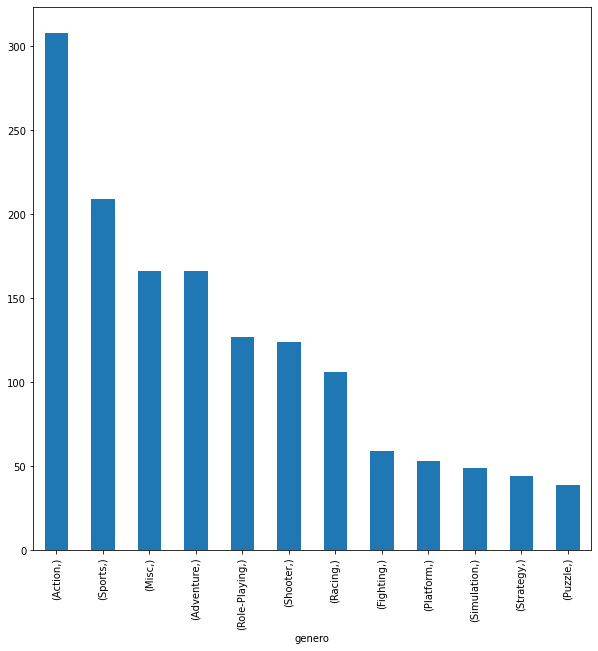

In [214]:
import matplotlib.pyplot as plt
novoDataFrame[['genero']].value_counts().plot.bar(figsize=(10,10))
plt.show()

**Vendas vs Genero**

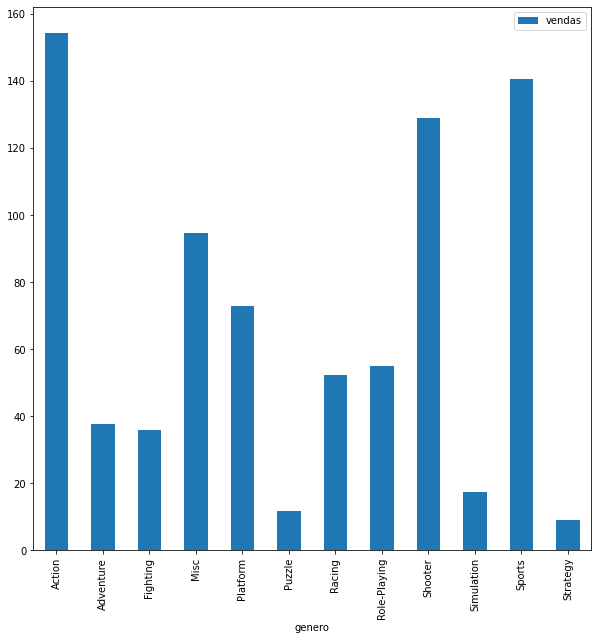

In [215]:
dadosAgrupados = novoDataFrame[['genero', 'vendas']]\
.groupby(['genero'])
dadosAgrupados.sum().\
pivot_table(index='genero', values='vendas')\
.plot.bar(figsize=(10,10))
plt.show()

**Numero de usuarios vs Genero**

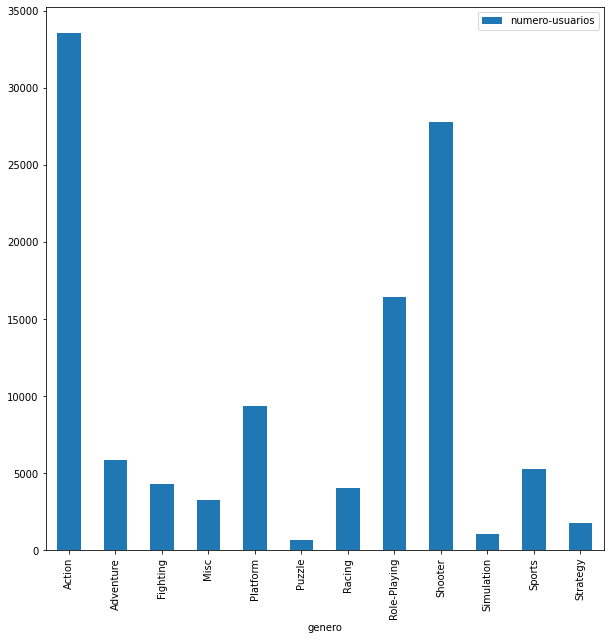

In [216]:
dadosAgrupados = novoDataFrame[['genero', 'numero-usuarios']]\
.groupby(['genero'])

dadosAgrupados.sum()\
.pivot_table(index='genero', values='numero-usuarios')\
.plot.bar(figsize=(10,10))

plt.show()

**avaliacao-usuarios vs Genero**

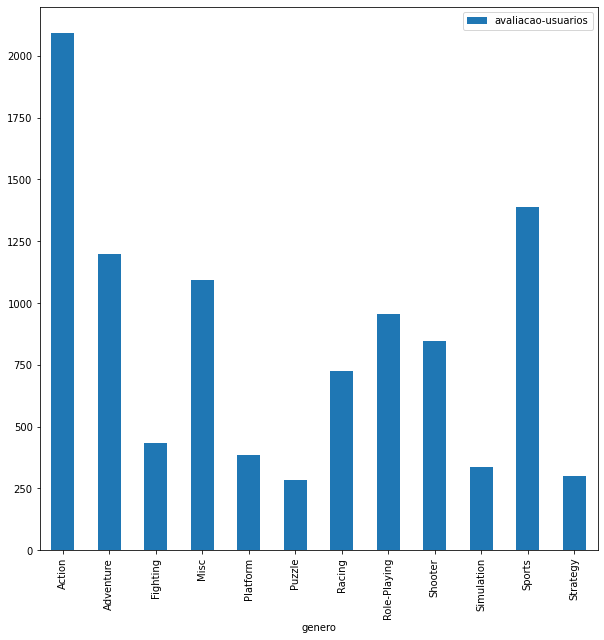

In [217]:
dadosAgrupados = novoDataFrame[['genero', 'avaliacao-usuarios']]\
.groupby(['genero'])

dadosAgrupados.sum()\
.pivot_table(index='genero', values='avaliacao-usuarios')\
.plot.bar(figsize=(10,10))

plt.show()

**numero-criticos vs Genero**

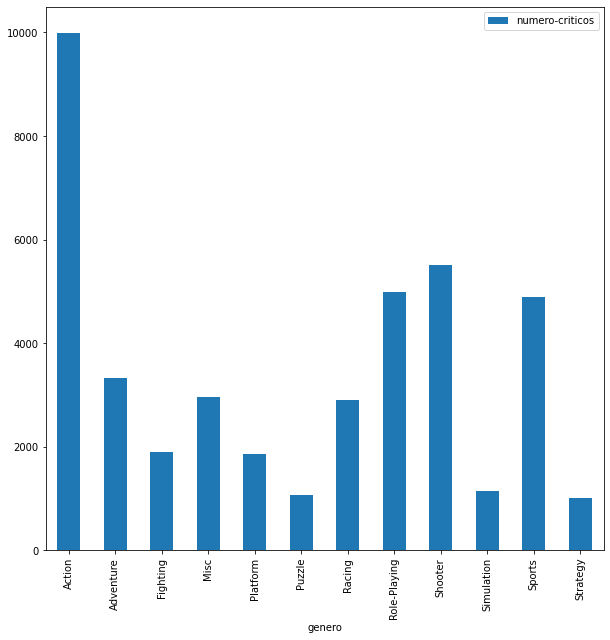

In [218]:
dadosAgrupados = novoDataFrame[['genero', 'numero-criticos']]\
.groupby(['genero'])
dadosAgrupados.sum()\
.pivot_table(index='genero', values='numero-criticos')\
.plot.bar(figsize=(10,10))

plt.show()

**avaliacao-criticos vs Genero**

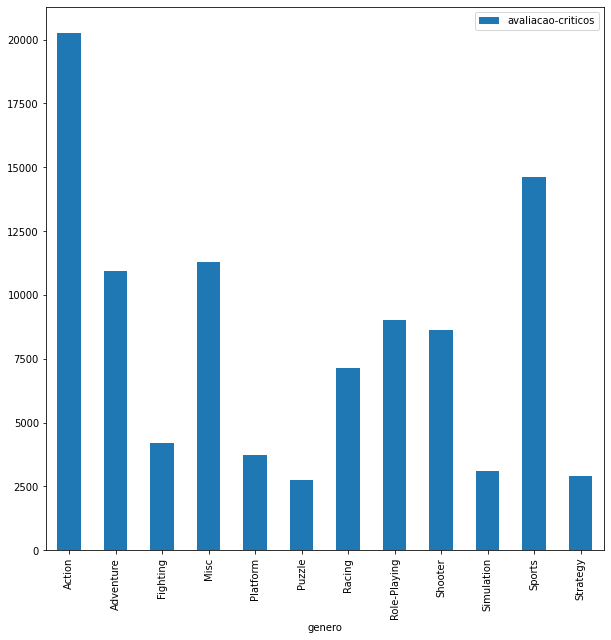

In [219]:
dadosAgrupados = novoDataFrame[['genero', 'avaliacao-criticos']]\
.groupby(['genero'])
dadosAgrupados.sum()\
.pivot_table(index='genero', values='avaliacao-criticos')\
.plot.bar(figsize=(10,10))
plt.show()